# Insurance claim fraud detection

In this project, aim to classify the data, if a fraud was reported or not for that particular data.

Our data set has 1000 rows and 40 different columns.

We need to to predict 'fraud_reported' as our target.

In [770]:
#Importing the basic necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [771]:
#Loading data into df using pandas

df = pd.read_csv('insurance_fraud.csv')

In [772]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [773]:
pd.set_option('display.max_columns',None)

In [774]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Exploratory Data Analysis and Data Modeling

We will now perform an exploratory data analysis on our dataset to check if we can find any meaningful insights for our data.

In [775]:
#Checking data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### Observation

- The data consists of mix columns with integer/float and object datatypes.
- There are 21 columns with datatype as object
- There are 17 integer columns
- There are 2 columns with datatype as float
- There is one column '_c39' which is completely NaN and can directly be dropped

In [776]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


### Observations -

- Months as customer has min value of 0 and max value as 479. 75% values have months as 276.
- Min age of customers is 19 and max is 64.
- Policy number starts from 100804 and ends at 999435. We expect this value to be a unique policy number for all customers.
- Policy deductable has min value as 500 and max value as 2000.
- Annual policy premium has min value 433 and max value 2047.
- Umbrella limit has 1 negative value as min value which appears to be incorrect, since umbrella limit should not be negative.
- insured zip column has min value as 430104 and max value as 620962.
- Capital gains have min value 0 and max value 100500.
- Capital loss is denoted by negative sign, its min value is 0 and max value is 111100.
- Number of vehicles involved are maximum 4 and minimum 1.
- Bodily injuries are min 0 and max 2
- Witnesses are min 0 and max 3
- Total claim amount ranges from 100 to 114920
- Injury claim ranges from 0 to 21450
- Property claim ranges from 0 to 23670
- Vehicle claim ranges from 70 to 79560
- Auto year is the make year of vehicle and is between 1995 to 2015.
- There are outliers expected in Capital gains and capital loss column

In [777]:
# Checking null values

df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

### Observation -

- As expected, '_c39' can be directly dropped due to completely NaN values
- We also observe that we have data represented by ?, which we will need to treat since this is the missing data

In [778]:
df.drop('_c39', axis =1, inplace = True)

In [779]:
df.replace('?', np.NaN, inplace = True)

In [780]:
#Checking NaN values again 

df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

### Observation 

We observe that we have missing values in collision_type, property_damage and police_report_available column, which we will treat later

- collision_type - 178 null values
- property_damage - 360 null values
- police_report_available - 343 null values


N    753
Y    247
Name: fraud_reported, dtype: int64

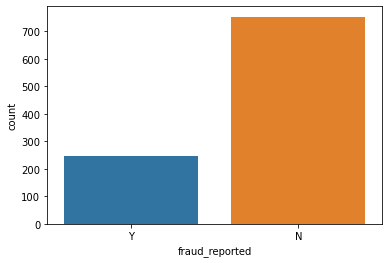

In [781]:
#Checking the distribution of fraud and non-fraud values in our dataset

sns.countplot(df.fraud_reported)
df.fraud_reported.value_counts()

### Observation 

We observe that our data has 753 values as N and 247 values as Y.
The fraud cases are quite less. The dataset is imbalanced.

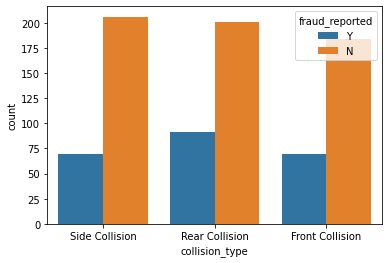

In [782]:
#Checking data distribution in collision_type column

sns.countplot(df.collision_type, hue = df.fraud_reported)

In [783]:
missing_collision_type = df[df['collision_type'].isnull()]

In [784]:
missing_collision_type['fraud_reported'].value_counts()

N    162
Y     16
Name: fraud_reported, dtype: int64

### Observation -

The data for fraud cases and non-fraud cases is almost evently divided between side/rear and front collisions, and has a maximum spread of ~75:205.

The data with NaN values has contains a high ratio difference 16:162, which would impact the division in case we add it to any existing category. Hence we create a separate category for the missing data.

In case we later observe the dependency on any other column which can help deduce the collision type, we will replace 'Unknown' category.

In [785]:
df['collision_type'].replace(np.NaN, 'Unknown', inplace = True)

NO     338
YES    302
Name: property_damage, dtype: int64

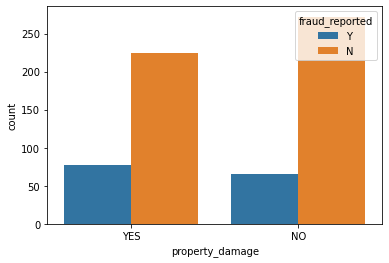

In [786]:
# Analysing the property damage column to fill missing values

sns.countplot(df.property_damage, hue = df.fraud_reported)
df.property_damage.value_counts()

In case a property damage is reported, the chances of fraud are higher than the case where property damage is not reported.

In [787]:
missing_property_damage = df[df['property_damage'].isnull()]

In [788]:
missing_property_damage['fraud_reported'].value_counts()

N    257
Y    103
Name: fraud_reported, dtype: int64

### Observation

In case the property_damage is missing, there are 257 cases where fraud is reported and 103 cases where fraud is not reported.

We will replace the missing values in property damage with Unknown, so that we do not hamper our distribution.

In [789]:
df.property_damage.replace(np.NaN, 'Unknown', inplace = True)

NO     343
YES    314
Name: police_report_available, dtype: int64

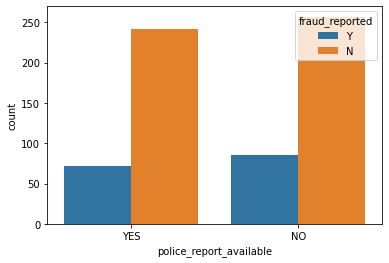

In [790]:
# Analysing the police_report_available column

sns.countplot(df.police_report_available, hue = df['fraud_reported'])
df.police_report_available.value_counts()

### Observations

The cases where police report was not available is higher than the available ones.

The number of fraud cases are also higher in this category.

In [791]:
missing_police_report_available = df[df['police_report_available'].isnull()]

In [792]:
missing_police_report_available['fraud_reported'].value_counts()

N    254
Y     89
Name: fraud_reported, dtype: int64

We will replace the data with the mode value, i.e. NO since the distribution is similar for both YES and NO columns.


In [793]:
df.police_report_available.replace(np.NaN, 'NO', inplace = True)

In [794]:
#Checking again if we have treated all the null values

df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

### Conclusion 

The null values have been successfully treated in our data

# Data plots

In [795]:
#Checking if datatypes of all columns are correct or need to be corrected

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Data types are correct

In [796]:
#Treating the policy bind date column

df.policy_bind_date = df.policy_bind_date.str.split('-')

df['bind_date'] = df.policy_bind_date.str[0]
df['bind_month'] = df.policy_bind_date.str[1]
df['bind_year'] = df.policy_bind_date.str[2]

In [797]:
#Treating the incident date column

df.incident_date = df.incident_date.str.split('-')

df['incident_date_'] = df.incident_date.str[0]
df['incident_month'] = df.incident_date.str[1]
df['incident_year'] = df.incident_date.str[2]

In [798]:
#Checking values in location column

len(df.incident_location.unique())

1000

The location column has all unique values, hence we will drop this column, since it would not allow our model to learn quite much

In [799]:
df.drop(['incident_date','policy_bind_date', 'incident_location'], axis =1 , inplace = True)

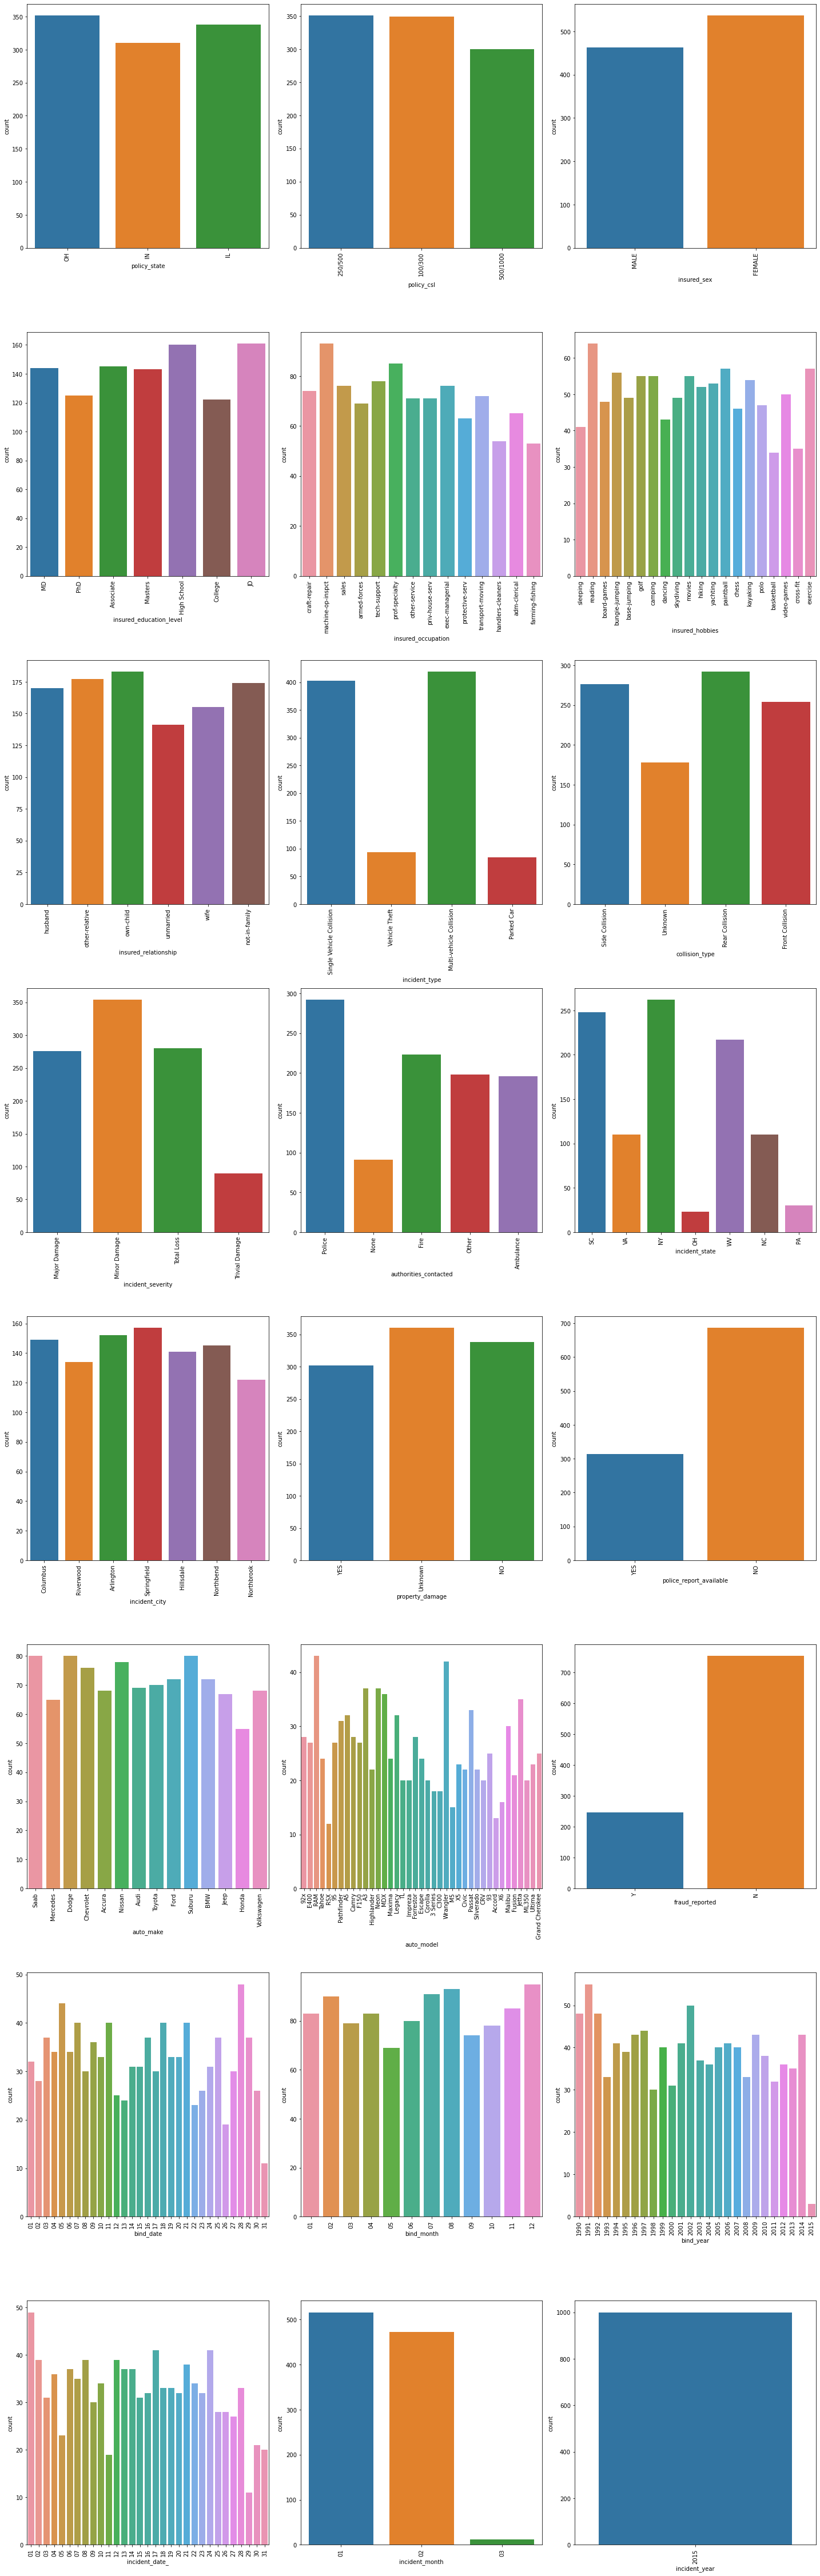

In [800]:
#Analysing object type columns

c=1
plt.figure(figsize=(20,70))

for i in df.columns:
    if df[i].dtype == 'object':
        plt.subplot(9,3,c)
        sns.countplot(df[i])
        plt.xticks(rotation = 90)
        plt.tight_layout(pad = 1.0)
        c=c+1
plt.show()

### Observations 

- The policy_state, policy_csl and insured_sex, insured_education, insured_occupation, insured_hobbies, insured_relationship, incident_city, property_damage, auto_make, bind_month, bind_year columns have almost equal distributions
- Incident type has lesser numbers for vehicle theft and parked car, while numbers for single vehicle collision and multi-vehicle_collision are high
- Collision type Unknown has a lesser count than rest of the categories
- There are less number of cases with trivial damage
- authorities contacted have lesser number with value as none
- There are less incidents in OH and PA state, highest number of incidents are from NY
- Auto model RAM and Wrangler have the highest count in automodel, RSX has the lowest
- Incidents in the month of March are the lowest
- Incident year has only one value - 2015, we will drop this column

In [801]:
df.drop('incident_year', axis = 1, inplace = True)

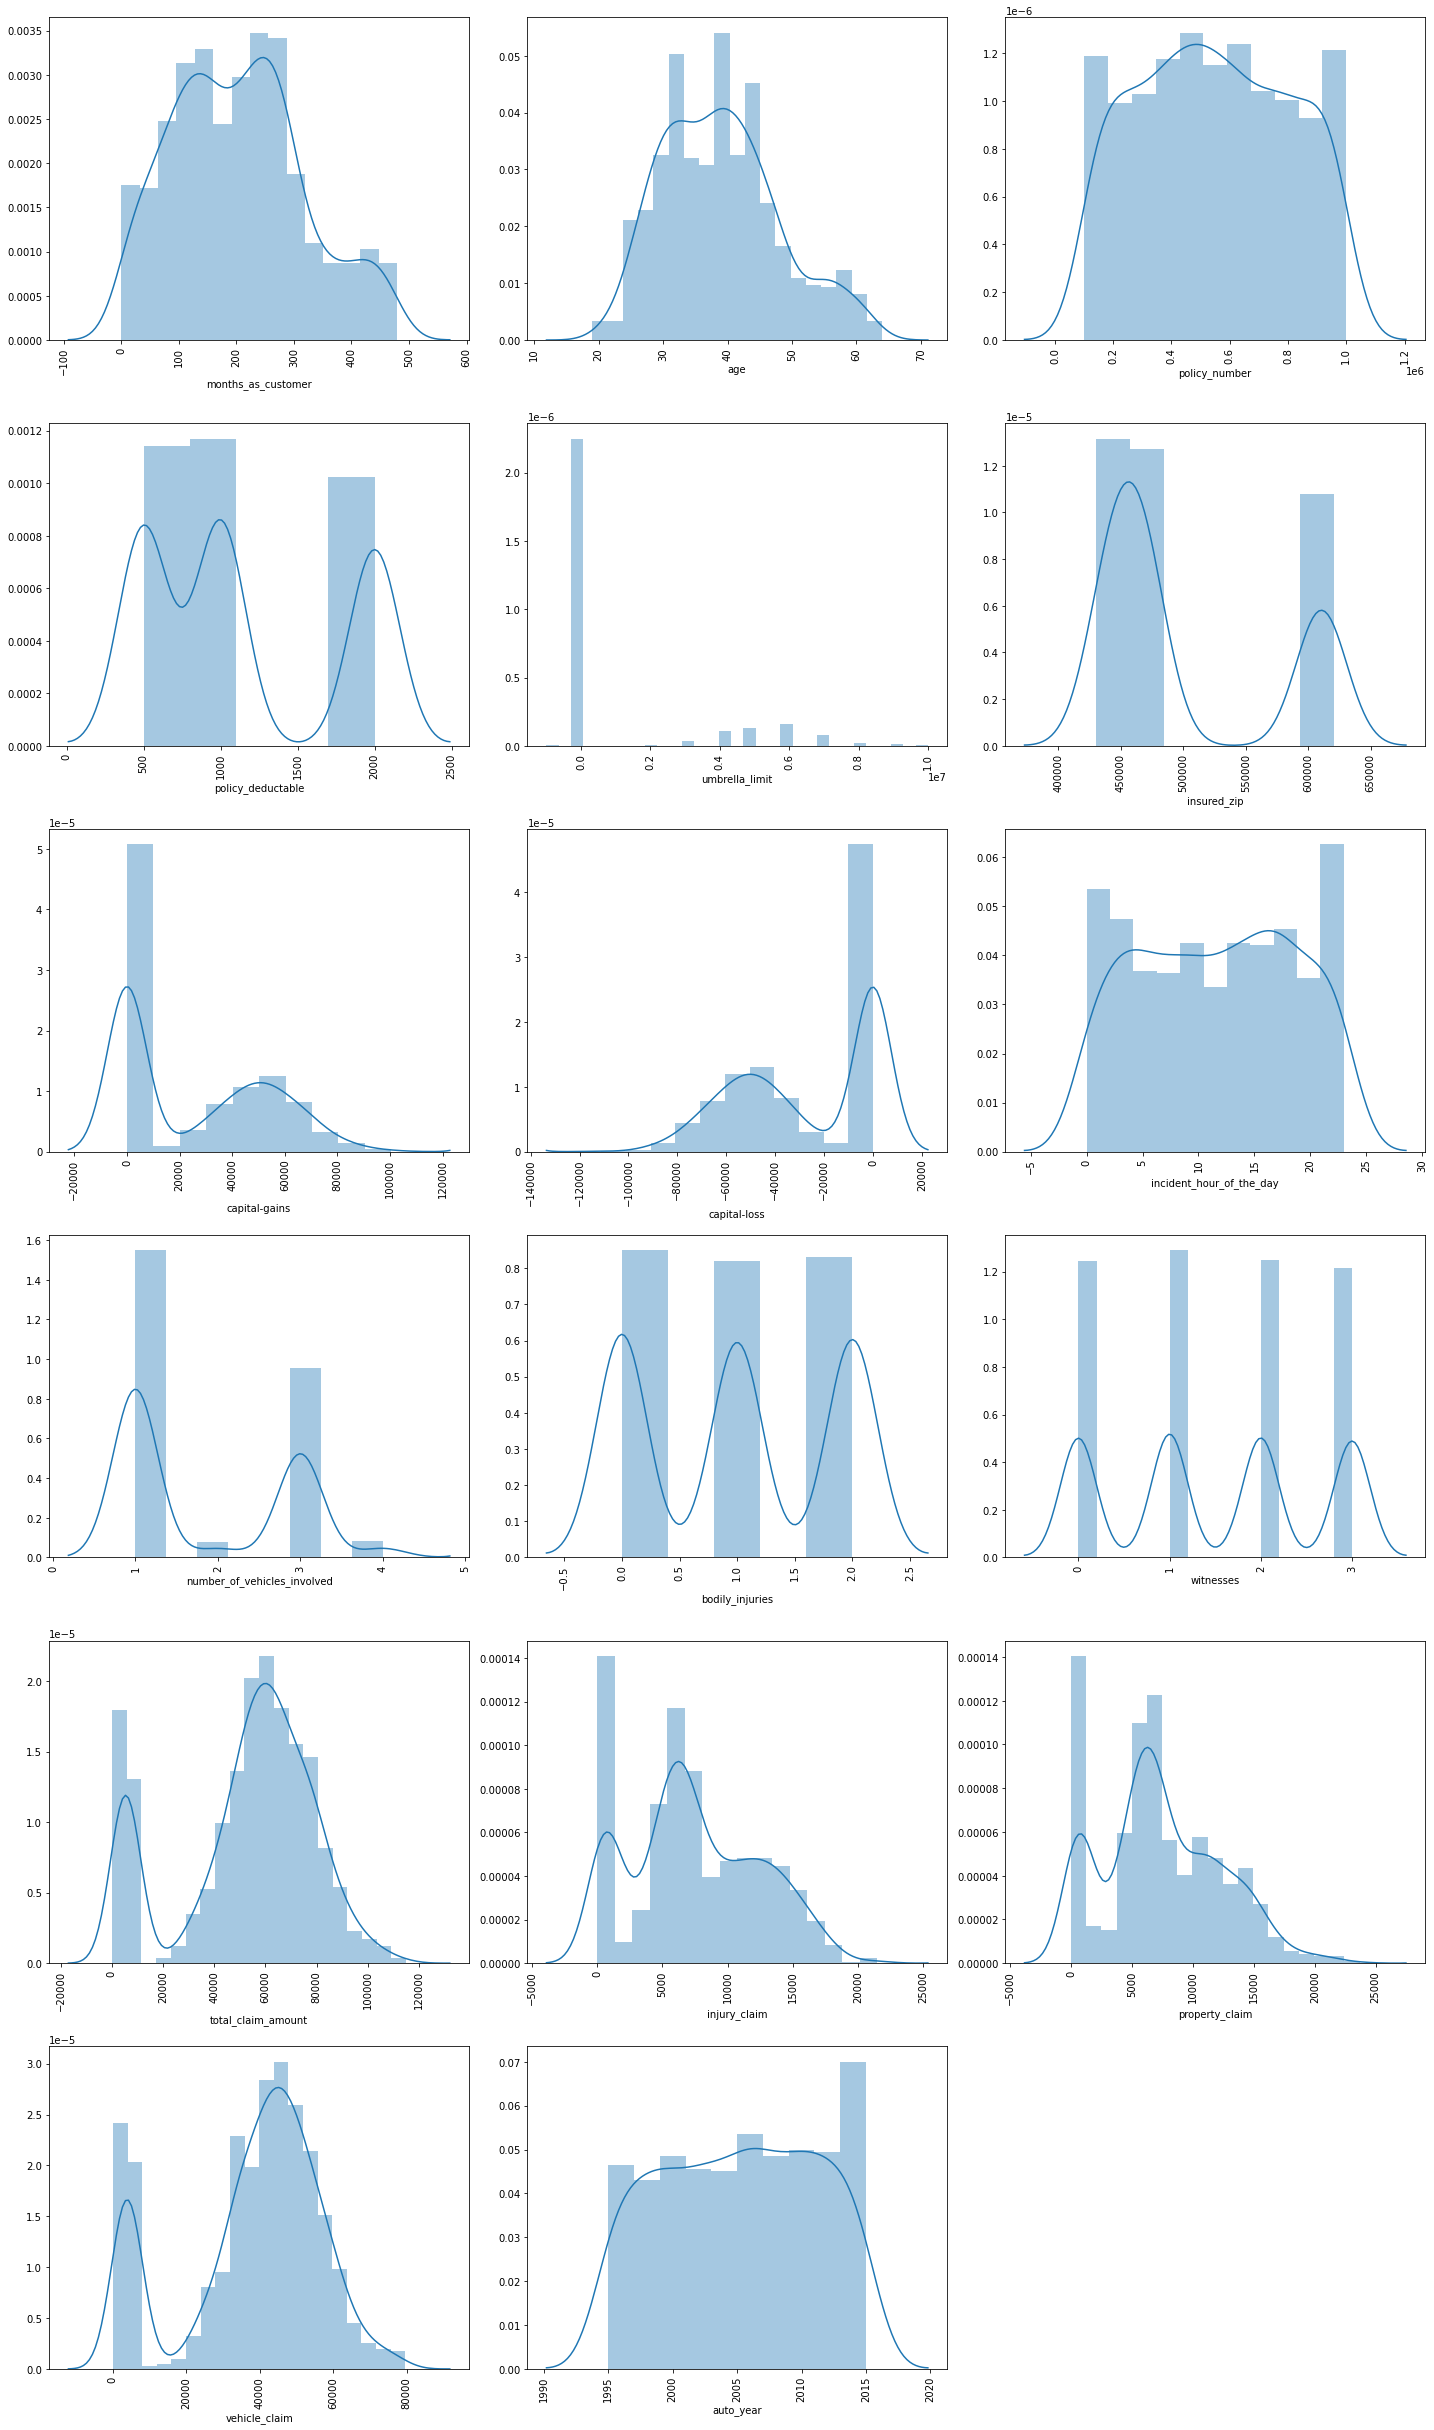

In [802]:
#Analysing int64 type columns

c=1
plt.figure(figsize=(20,50))

for i in df.columns:
    if df[i].dtype == 'int64':
        plt.subplot(9,3,c)
        sns.distplot(df[i])
        plt.xticks(rotation = 90)
        plt.tight_layout(pad = 1.0)
        c=c+1
plt.show()

### Observations

- Policy_deductable either lies in a range 500-1100, and then is from 1700-2000, between these ranges we do not have any values
- Umbrella limit has majority values as 0
- Insured zip either falls in a range 430000 - 490000, else between 590000-620000.
- Capital gains have majorly 0 values, else the range is between 10000-100000.
- Capital loss have negative values, and majority of the values are 0.
- Majority of the incidents occur during 0:00 - 3:00 am and 22:00 - 00:00 pm, which means incidents occur majorly during nights.
- Number of vehicles involved has 1 as the maximum count, and 3 also has a significant count. The accidents with vehicles involved as 2 and 4 are less
- Total claim account, injury claim and property claim has a large number of values as 0.
- Cehicle claim has many values between 0 - 9000, rest is divided between 20k and 80k
- Auto year is almost evenly divided in 1995 - 2014, but the count is high in 2015.

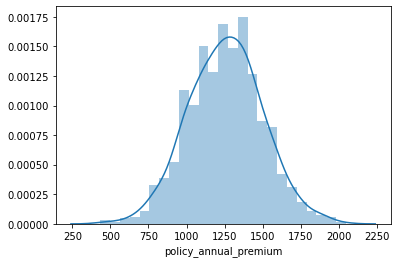

In [803]:
sns.distplot(df.policy_annual_premium)

The distribution is normal in policy annual premium column

### Bivariate analysis

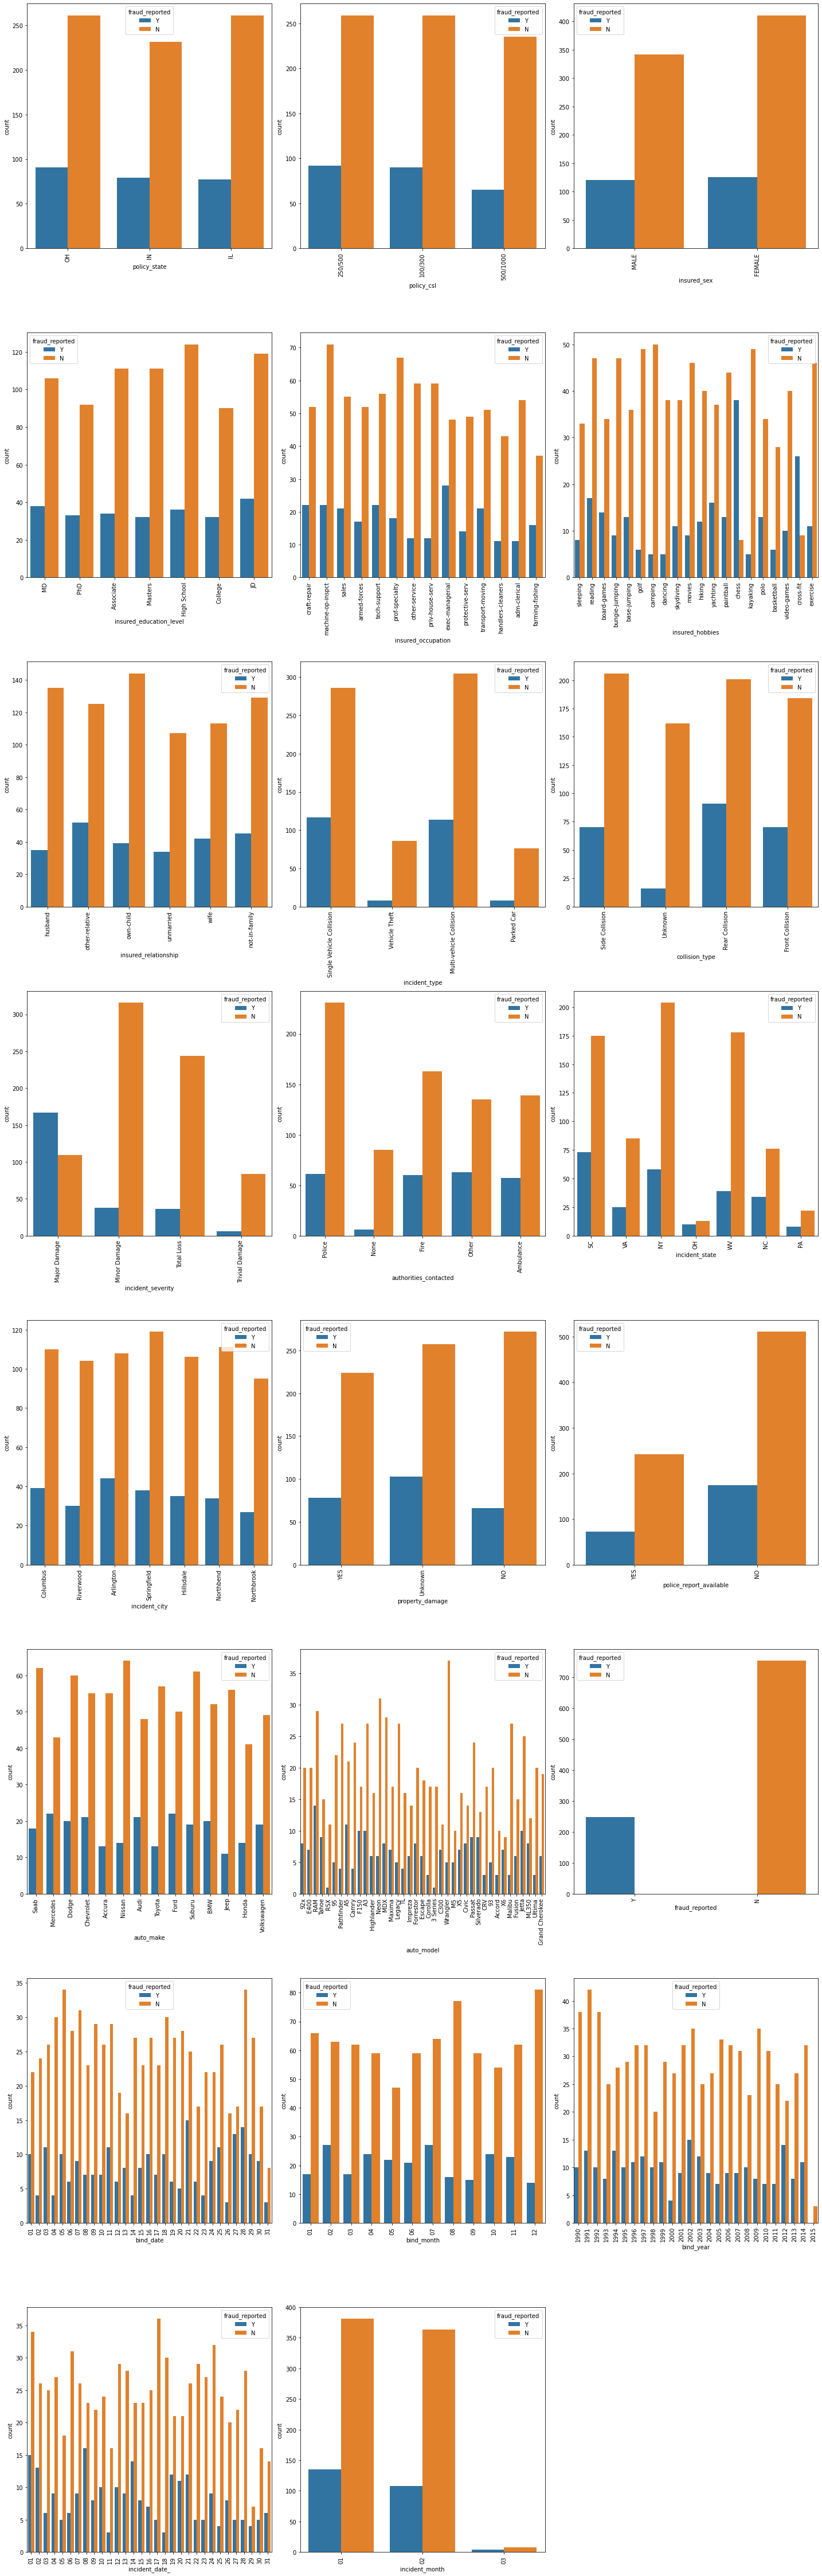

In [804]:
#Analysing object type columns with fraud_reported as hue

c=1
plt.figure(figsize=(20,70))

for i in df.columns:
    if df[i].dtype == 'object':
        plt.subplot(9,3,c)
        sns.countplot(df[i], hue=df.fraud_reported)
        plt.xticks(rotation = 90)
        plt.tight_layout(pad = 1.0)
        c=c+1
plt.show()

### Observations

- In case insured occupation is exec-managerial, the chances of fraud are high
- Chances of fraud are high in case hobbies of a person are chess/cross-fit
- In case collision_type is Rear collision, chances of fraud are high
- In case incident severity is Major Damage, chances of fraud are high
- In case incident state is OH, ratio of frauds is similar to Non-fraud cases
- In case auto-model is RAM, A5, F150, C300, M5, Silverado,X6, ML350, the chances of fraud are high, almost half of non-fraud cases.
- Incidents reported on 27 as bind date have almost same ratio of fraud and non-fraud cases, incidents on bind date 21 have more than half ratio of cases as fraud
- There are no fraud cases in case bind year is 2015
- If incident date is 8, number of fraud cases is high (almost 4:5 ratio of fraud:non-fraud cases)
- Incidents on 29th date have 3:5 ratio of fraud:non-fraud c

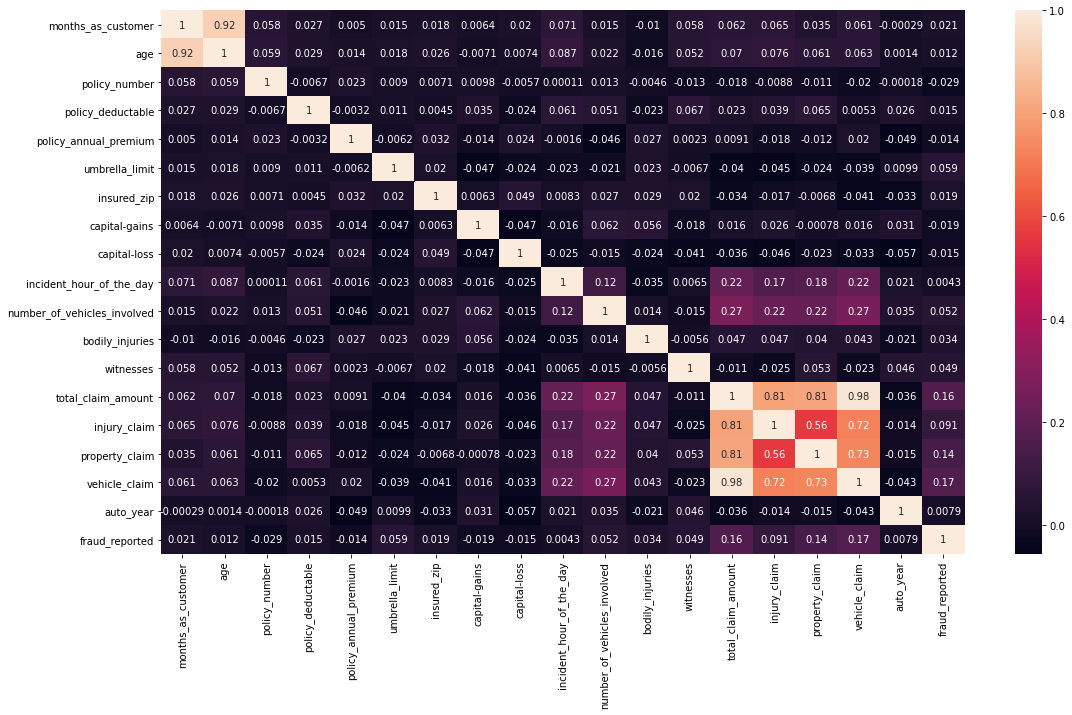

In [805]:
#Checking correlation of numerical columns with Fraud_reported column

df.fraud_reported.replace('Y',1, inplace = True)
df.fraud_reported.replace('N',0, inplace = True)

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot = True)

### Observations

- The fraud_reported column has a 16% correlation with total_claim_amount, 14% correlation with property claim amount and 17% correlation with vehicle_claim amount, which shows that incase these amounts increase, the chances of fraud also increases.
- We notice the correlations as moderate correlations and not very high correlations.

- We also notice that claim amounts are inter-correlated (between 70 - 80% correlation).
- Months as customer and age also has a high correlation (92%)

In [806]:
#replacing the Yes and No values as 0 and 1, and unknown values as 2 in our data

df.replace('Y',1, inplace = True)
df.replace('N',0, inplace = True)
df.replace('YES',1, inplace = True)
df.replace('NO',0, inplace = True)
df.replace('Unknown',2, inplace = True)

In [807]:
df.sample(10)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,bind_date,bind_month,bind_year,incident_date_,incident_month
730,116,31,615116,IN,250/500,500,1194.83,0,603733,FEMALE,MD,prof-specialty,camping,husband,28600,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Riverwood,23,1,0,0,0,0,44200,4420,8840,30940,Suburu,Forrestor,1997,0,09,11,2008,20,01
714,475,61,607974,IL,500/1000,500,1265.72,0,612506,FEMALE,Masters,handlers-cleaners,paintball,wife,0,-59500,Single Vehicle Collision,Front Collision,Major Damage,Fire,SC,Columbus,23,1,1,0,2,0,64350,9900,9900,44550,Mercedes,E400,1998,0,12,08,2004,18,02
839,234,43,965187,OH,250/500,500,1257.04,0,448294,MALE,Associate,protective-serv,reading,own-child,0,-48800,Single Vehicle Collision,Rear Collision,Major Damage,Police,SC,Northbrook,4,1,0,2,2,1,51600,10320,5160,36120,Dodge,Neon,2011,0,26,03,1990,01,03
953,229,43,791425,IN,250/500,2000,1585.54,0,463153,MALE,High School,protective-serv,reading,not-in-family,42600,-44400,Vehicle Theft,2,Minor Damage,None,WV,Hillsdale,3,1,0,1,0,1,4620,420,840,3360,Volkswagen,Jetta,2012,0,18,06,1997,26,02
642,143,32,111874,IL,500/1000,1000,1464.42,0,468986,FEMALE,High School,exec-managerial,golf,husband,79900,0,Single Vehicle Collision,Rear Collision,Major Damage,Ambulance,SC,Springfield,1,1,2,2,0,0,62260,5660,5660,50940,Saab,92x,1995,0,05,07,2000,15,01
503,289,48,231127,IL,500/1000,500,1173.37,8000000,461744,FEMALE,PhD,handlers-cleaners,board-games,own-child,0,-42700,Single Vehicle Collision,Front Collision,Total Loss,Other,SC,Springfield,1,1,2,1,0,0,42900,8580,0,34320,Accura,TL,1999,0,29,08,1995,09,01
584,96,27,633090,IL,100/300,1000,1631.10,0,437323,FEMALE,High School,priv-house-serv,exercise,wife,0,0,Parked Car,2,Trivial Damage,Police,WV,Arlington,4,1,2,1,2,0,6030,670,670,4690,Nissan,Pathfinder,2007,0,17,02,2009,23,01
205,223,43,650026,OH,500/1000,500,1235.10,0,466959,FEMALE,Masters,tech-support,exercise,not-in-family,66400,-34400,Single Vehicle Collision,Rear Collision,Minor Damage,Police,SC,Springfield,14,1,0,2,1,0,54400,5440,5440,43520,BMW,M5,2011,0,09,05,2009,10,02
269,195,36,842618,IN,100/300,2000,1346.18,0,611852,FEMALE,Associate,machine-op-inspct,camping,wife,57800,-53300,Multi-vehicle Collision,Front Collision,Total Loss,Fire,SC,Hillsdale,14,3,1,2,3,1,68970,12540,6270,50160,Chevrolet,Tahoe,2007,0,06,11,2001,25,02
858,233,43,898519,OH,250/500,1000,954.18,0,437470,FEMALE,College,tech-support,dancing,other-relative,0,0,Multi-vehicle Collision,Side Collision,Minor Damage,Other,SC,Northbrook,17,3,2,2,3,1,42500,8500,4250,29750,Nissan,Pathfinder,2000,0,21,05,2000,17,02


In [808]:
#Treating negative value in umbrella limit column

df.umbrella_limit.replace(-1000000,0, inplace = True)

In [809]:
#Changing capital loss to positive values 

df['capital-loss'] = abs(df['capital-loss'])

In [810]:
df.sample(10)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,bind_date,bind_month,bind_year,incident_date_,incident_month
989,22,21,550127,IN,250/500,1000,1248.05,0,443550,FEMALE,High School,exec-managerial,movies,husband,37500,54000,Multi-vehicle Collision,Rear Collision,Total Loss,Police,SC,Arlington,3,3,1,1,2,0,53280,5920,0,47360,Chevrolet,Malibu,2015,0,04,07,2007,15,02
962,150,37,649800,OH,500/1000,1000,1007.00,0,466238,FEMALE,PhD,transport-moving,board-games,unmarried,30400,89400,Single Vehicle Collision,Rear Collision,Total Loss,Police,VA,Arlington,9,1,0,0,2,0,80080,12320,12320,55440,Chevrolet,Silverado,2013,0,16,03,2014,27,01
349,230,39,331595,IL,100/300,1000,904.70,7000000,454530,FEMALE,MD,craft-repair,bungie-jumping,unmarried,68600,22300,Single Vehicle Collision,Front Collision,Major Damage,Fire,SC,Riverwood,0,1,2,1,3,0,74200,14840,14840,44520,Accura,TL,2002,1,29,11,1999,17,02
950,101,27,557218,IL,500/1000,500,982.70,6000000,440865,FEMALE,College,transport-moving,video-games,unmarried,30800,43700,Parked Car,2,Minor Damage,None,SC,Arlington,9,1,0,1,0,0,5170,940,470,3760,Toyota,Camry,2001,0,23,11,1997,13,01
55,22,26,420810,OH,100/300,1000,1276.57,0,467784,MALE,PhD,craft-repair,skydiving,not-in-family,71500,0,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,NY,Arlington,3,1,1,1,2,0,78900,15780,7890,55230,Chevrolet,Silverado,1995,0,11,08,2007,06,01
428,167,36,287489,IL,100/300,1000,949.44,0,448603,FEMALE,Masters,exec-managerial,camping,other-relative,0,38400,Multi-vehicle Collision,Rear Collision,Major Damage,Ambulance,NC,Springfield,22,3,2,0,0,0,69680,8710,8710,52260,Mercedes,ML350,2008,1,03,02,1994,19,01
688,290,47,885789,IN,250/500,1000,1393.34,0,472922,MALE,High School,exec-managerial,bungie-jumping,other-relative,0,61400,Multi-vehicle Collision,Side Collision,Minor Damage,Ambulance,WV,Northbend,20,3,1,1,3,1,56160,6240,12480,37440,Audi,A5,2002,0,21,07,2008,15,01
324,97,26,225865,IL,250/500,1000,1252.08,0,465456,MALE,College,exec-managerial,sleeping,not-in-family,0,0,Multi-vehicle Collision,Rear Collision,Major Damage,Other,VA,Springfield,4,2,1,2,2,0,50400,10080,5040,35280,Honda,CRV,2000,1,04,11,1991,08,02
263,244,40,226725,IN,500/1000,2000,1304.67,7000000,605408,MALE,Masters,armed-forces,base-jumping,other-relative,0,45000,Multi-vehicle Collision,Side Collision,Minor Damage,Police,SC,Hillsdale,5,3,2,1,1,0,61490,5590,11180,44720,Dodge,RAM,2001,0,11,08,1999,10,01
68,128,30,500533,OH,100/300,1000,1061.33,0,478575,MALE,MD,machine-op-inspct,movies,own-child,43300,66200,Single Vehicle Collision,Front Collision,Major Damage,Ambulance,WV,Northbrook,8,1,0,0,3,0,68530,12460,6230,49840,Audi,A5,1997,0,11,02,1994,10,01


In [811]:
#Dropping the columns identified as extra from our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [812]:
df.drop(['policy_number'], axis = 1, inplace = True)

In [813]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,bind_date,bind_month,bind_year,incident_date_,incident_month
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,1,1,2,1,71610,6510,13020,52080,Saab,92x,2004,1,17,10,2014,25,01
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,2,Minor Damage,Police,VA,Riverwood,8,1,2,0,0,0,5070,780,780,3510,Mercedes,E400,2007,1,27,06,2006,21,01
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,0,2,3,0,34650,7700,3850,23100,Dodge,RAM,2007,0,06,09,2000,22,02
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,2,1,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,25,05,1990,10,01
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,46000,Vehicle Theft,2,Minor Damage,None,NY,Arlington,20,1,0,0,1,0,6500,1300,650,4550,Accura,RSX,2009,0,06,06,2014,17,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,1,0,1,0,87200,17440,8720,61040,Honda,Accord,2006,0,16,07,1991,22,02
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,1,2,3,0,108480,18080,18080,72320,Volkswagen,Passat,2015,0,05,01,2014,24,01
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,2,2,3,1,67500,7500,7500,52500,Suburu,Impreza,1996,0,17,02,2003,23,01
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,2,0,1,1,46980,5220,5220,36540,Audi,A5,1998,0,18,11,2011,26,02


# Outlier detection


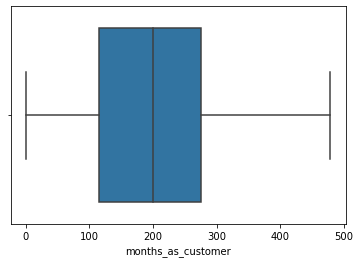

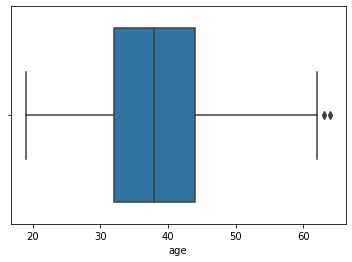

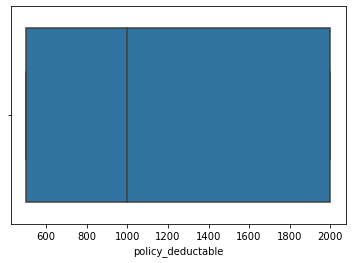

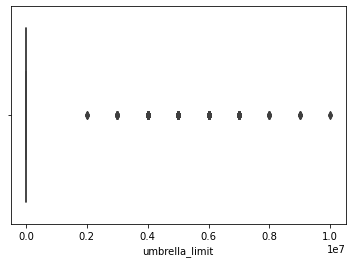

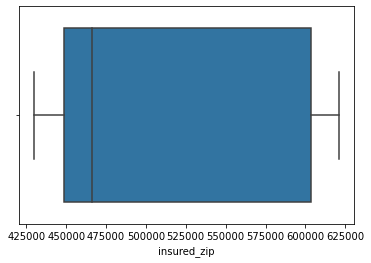

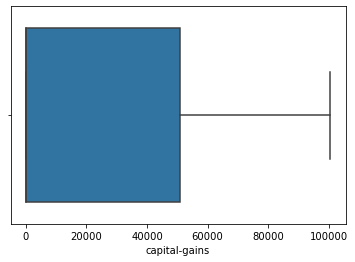

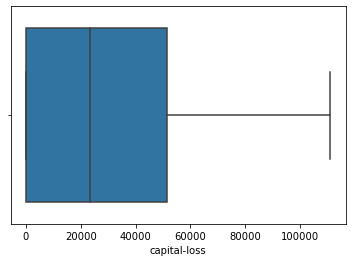

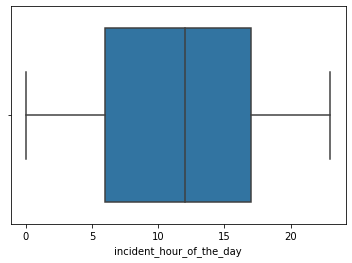

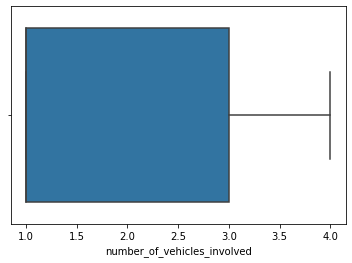

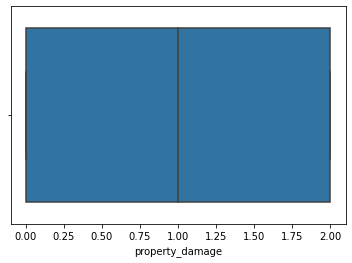

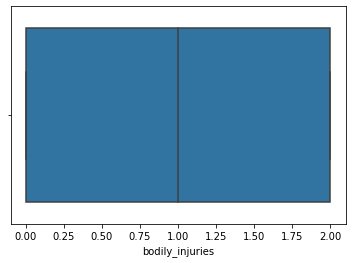

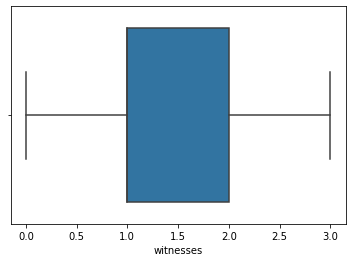

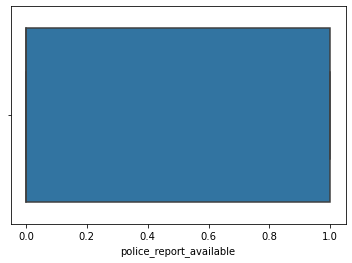

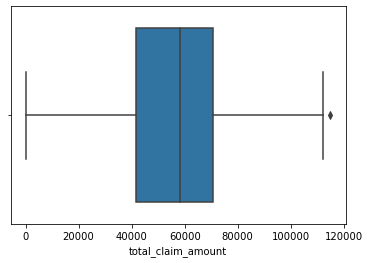

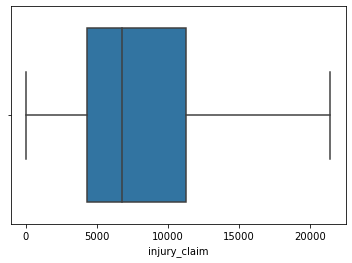

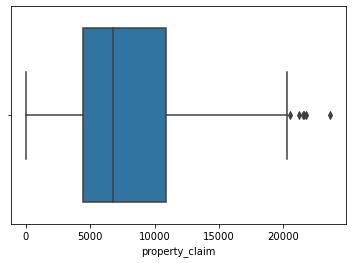

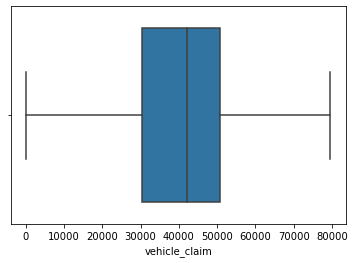

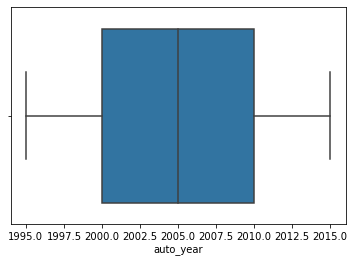

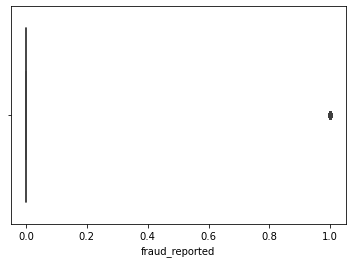

In [814]:
for i in df.columns:
    if df[i].dtype == 'int64':
        sns.boxplot(df[i])
        plt.show()

In [815]:
from scipy.stats import zscore

In [816]:
numerical_data = []

for i in df.columns:
    if df[i].dtype != 'object':
        numerical_data.append(i)

In [817]:
numerical_data

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'fraud_reported']

In [818]:
zs = zscore(df[numerical_data])

In [819]:
zs

array([[ 1.07813958,  0.99083647, -0.22238259, ...,  0.74965272,
        -0.1834404 ,  1.74601919],
       [ 0.2089946 ,  0.33407345,  1.41278352, ..., -1.82334593,
         0.31549088,  1.74601919],
       [-0.60800168, -1.08891308,  1.41278352, ..., -0.78556451,
         0.31549088, -0.57273139],
       ...,
       [-0.64276748, -0.54161057, -1.03996564, ...,  0.77190224,
        -1.5139238 , -0.57273139],
       [ 2.20802805,  2.52328351,  1.41278352, ..., -0.07357971,
        -1.18130295, -0.57273139],
       [ 2.19064515,  2.3043625 , -0.22238259, ..., -1.81434017,
         0.31549088, -0.57273139]])

In [820]:
#Checking data with outliers

df[((abs(zs)<3).all(axis=1))==False]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,bind_date,bind_month,bind_year,incident_date_,incident_month
31,166,37,IL,100/300,2000,1337.28,8000000,610393,MALE,JD,craft-repair,reading,husband,27500,0,Multi-vehicle Collision,Side Collision,Major Damage,Police,WV,Riverwood,10,3,0,2,2,0,67140,7460,7460,52220,Ford,F150,2006,1,19,06,2008,28,02
48,175,34,IN,500/1000,1000,1123.87,8000000,446326,FEMALE,PhD,protective-serv,dancing,other-relative,0,0,Vehicle Theft,2,Trivial Damage,Police,NY,Arlington,5,1,2,2,0,1,7290,810,810,5670,Volkswagen,Passat,1995,0,07,01,2008,26,02
88,31,36,IL,500/1000,2000,1318.24,9000000,601748,FEMALE,College,prof-specialty,kayaking,not-in-family,0,78600,Parked Car,2,Trivial Damage,None,WV,Arlington,9,1,0,0,1,1,4700,940,470,3290,Dodge,Neon,2002,0,15,08,1999,30,01
115,258,46,IN,100/300,1000,1110.37,10000000,455365,MALE,MD,machine-op-inspct,hiking,other-relative,34400,56800,Multi-vehicle Collision,Side Collision,Total Loss,Other,NY,Riverwood,14,3,0,0,1,0,47700,4770,9540,33390,Accura,MDX,1997,1,09,03,1999,24,01
119,245,39,OH,250/500,500,964.79,8000000,460675,FEMALE,Associate,adm-clerical,camping,husband,58000,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Arlington,7,3,2,0,1,0,72820,13240,6620,52960,BMW,3 Series,2010,0,21,04,2001,20,02
229,154,37,IL,250/500,1000,2047.59,0,439269,FEMALE,MD,farming-fishing,dancing,other-relative,0,67800,Single Vehicle Collision,Rear Collision,Minor Damage,Other,SC,Columbus,2,1,2,0,3,0,79530,14460,7230,57840,Accura,MDX,2000,0,28,01,2010,09,01
248,101,27,IL,250/500,1000,433.33,0,603269,MALE,Masters,machine-op-inspct,golf,other-relative,25900,0,Parked Car,2,Minor Damage,None,SC,Hillsdale,7,1,2,0,3,0,5900,1180,590,4130,Mercedes,E400,2009,0,10,02,2007,02,01
262,232,43,OH,250/500,500,1483.91,8000000,431531,MALE,College,machine-op-inspct,golf,husband,0,33600,Multi-vehicle Collision,Rear Collision,Major Damage,Ambulance,NY,Arlington,17,3,0,0,1,0,70600,7060,14120,49420,Volkswagen,Passat,2013,1,16,05,2001,18,01
314,91,30,IL,250/500,2000,1316.63,8000000,613178,FEMALE,Masters,machine-op-inspct,golf,unmarried,43900,0,Multi-vehicle Collision,Side Collision,Minor Damage,Other,SC,Northbend,13,3,1,2,0,0,84500,13000,13000,58500,BMW,X6,2009,0,18,06,2010,08,01
430,264,47,IN,250/500,2000,1181.46,10000000,601117,FEMALE,JD,transport-moving,sleeping,other-relative,0,67400,Multi-vehicle Collision,Front Collision,Total Loss,Ambulance,OH,Arlington,16,4,1,1,2,1,62370,5670,5670,51030,Dodge,Neon,2001,0,07,03,2005,12,02


We observe the presence of outliers in age, umbrella limit, total_claim_amount, property_claim columns.

There are 20 rows which will be removed in case we drop the outliers. These rows have 6 values reported as fraud and 14 as non_fraud.

We will not remove the outliers since the values are not incorrect values, but are categorized as outliers since majority of the people do not fall in this range.
We will lose data for higher ranges in case we drop these rows.

# Skewness treatment

In [821]:
df[numerical_data].skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.807708
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                   0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.041341
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
dtype: float64

We need to remove skewness from umrella-limit, insured_zip, police_report_available columns.

Transforming the data using cuberoot transform

In [822]:
for i in ['umbrella_limit','insured_zip','police_report_available']:
    df[i] = np.cbrt(np.cbrt(df[i]))

In [823]:
df[numerical_data].skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.499098
insured_zip                    0.786558
capital-gains                  0.478850
capital-loss                   0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.041341
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
dtype: float64

We will drop these columns since these columns have high skewness and which is not getting removed after multiple transformations.

Also, we have observed that these columns do not make major impacts on the fraud_reported cases.

In [824]:
df.drop(['umbrella_limit','police_report_available','insured_zip'], axis = 1, inplace = True)

In [825]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,bind_date,bind_month,bind_year,incident_date_,incident_month
0,328,48,OH,250/500,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,1,1,2,71610,6510,13020,52080,Saab,92x,2004,1,17,10,2014,25,01
1,228,42,IN,250/500,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,2,Minor Damage,Police,VA,Riverwood,8,1,2,0,0,5070,780,780,3510,Mercedes,E400,2007,1,27,06,2006,21,01
2,134,29,OH,100/300,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,0,2,3,34650,7700,3850,23100,Dodge,RAM,2007,0,06,09,2000,22,02
3,256,41,IL,250/500,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,48900,62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,2,1,2,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,25,05,1990,10,01
4,228,44,IL,500/1000,1000,1583.91,MALE,Associate,sales,board-games,unmarried,66000,46000,Vehicle Theft,2,Minor Damage,None,NY,Arlington,20,1,0,0,1,6500,1300,650,4550,Accura,RSX,2009,0,06,06,2014,17,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,1,0,1,87200,17440,8720,61040,Honda,Accord,2006,0,16,07,1991,22,02
996,285,41,IL,100/300,1000,1436.79,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,1,2,3,108480,18080,18080,72320,Volkswagen,Passat,2015,0,05,01,2014,24,01
997,130,34,OH,250/500,500,1383.49,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,2,2,3,67500,7500,7500,52500,Suburu,Impreza,1996,0,17,02,2003,23,01
998,458,62,IL,500/1000,2000,1356.92,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,2,0,1,46980,5220,5220,36540,Audi,A5,1998,0,18,11,2011,26,02


# Encoding the categorical data

In [826]:
from sklearn.preprocessing import LabelEncoder

In [827]:
le = LabelEncoder()

In [828]:
df.collision_type.unique()

array(['Side Collision', 2, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [829]:
df.collision_type.replace(2, 'Unknown', inplace = True)

In [830]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        df[i] = le.fit_transform(df[i])

policy_state
policy_csl
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
auto_make
auto_model
bind_date
bind_month
bind_year
incident_date_
incident_month


In [831]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   insured_sex                  1000 non-null   int32  
 7   insured_education_level      1000 non-null   int32  
 8   insured_occupation           1000 non-null   int32  
 9   insured_hobbies              1000 non-null   int32  
 10  insured_relationship         1000 non-null   int32  
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

In [832]:
df.sample()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,bind_date,bind_month,bind_year,incident_date_,incident_month
752,405,55,0,1,500,878.19,1,6,6,9,4,57100,0,0,1,1,1,0,3,2,4,1,0,2,38640,4830,4830,28980,3,34,1997,0,4,6,9,0,2


We have successfully encoded the data

# Scaling the data

In [833]:
#Lets bring all features to a common scale using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [834]:
#Dividing the dataset into independent and dependent data before scaling

ds_x = df.drop('fraud_reported', axis = 'columns')
y = df['fraud_reported']

In [835]:
dataset = sc.fit_transform(ds_x)

x = pd.DataFrame(dataset,columns=ds_x.columns)

In [836]:
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,bind_date,bind_month,bind_year,incident_date_,incident_month
0,1.078140,0.990836,1.187173,0.060937,-0.222383,0.616705,1.076953,0.530931,-1.158316,1.281737,-1.437957,1.011331,-0.953851,0.766005,0.593292,-1.260614,1.196963,0.351762,-0.962196,-0.956261,-0.823865,-0.026342,0.009759,0.461838,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,-0.183440,0.176292,0.983684,1.684992,1.154424,-0.947587
1,0.208995,0.334073,-0.016856,0.060937,1.412784,-0.242521,1.076953,0.530931,-0.162558,0.929078,-0.247595,-0.901927,-0.953851,1.691132,1.547138,-0.195906,1.196963,0.815829,0.995476,-0.524475,-0.823865,1.171013,-1.210174,-1.338700,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,0.315491,1.312191,-0.159802,0.597550,0.692885,-0.947587
2,-0.608002,-1.088913,1.187173,-1.182668,1.412784,0.642233,-0.928546,1.557877,1.082141,-1.363201,0.347586,0.358023,-0.953851,-1.084249,-0.360554,-0.195906,1.196963,-1.040437,-0.962196,-0.668404,1.140056,-1.223697,1.229693,1.362107,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,0.315491,-1.073198,0.697813,-0.218032,0.808270,0.962871
3,0.452355,0.224613,-1.220886,0.060937,1.412784,0.652886,-0.928546,1.557877,-1.407256,-1.363201,0.942766,0.853388,1.267577,0.766005,-1.314400,-1.260614,1.196963,-0.576371,-1.451614,-0.956261,-0.823865,1.171013,0.009759,0.461838,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074,1.479664,1.085011,-0.445674,-1.577335,-0.576347,-0.947587
4,0.208995,0.552994,-1.220886,1.304542,-0.222383,1.341980,1.076953,-1.522961,1.082141,-1.363201,0.942766,1.467210,0.683741,1.691132,1.547138,-0.195906,-0.109052,-1.040437,-1.451614,1.202666,-0.823865,-1.223697,-1.210174,-0.438431,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,0.648112,-1.073198,-0.159802,1.684992,0.231346,0.962871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.187173,1.304542,-0.222383,0.222884,-0.928546,1.044404,-1.158316,0.576420,0.942766,-0.901927,-0.953851,0.766005,-1.314400,-0.195906,-0.762060,-1.504504,0.506058,1.202666,-0.823865,-0.026342,-1.210174,-0.438431,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528,0.149180,0.062702,0.126069,-1.441405,0.808270,0.962871
996,0.704407,0.224613,-1.220886,-1.182668,-0.222383,0.739141,-0.928546,1.557877,0.584261,1.281737,1.537947,1.643100,-0.953851,0.766005,-0.360554,-1.260614,-0.762060,0.351762,0.016640,1.634452,-0.823865,-0.026342,1.229693,1.362107,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,1.645974,-1.186788,-1.589160,1.684992,1.039039,-0.947587
997,-0.642767,-0.541611,1.187173,0.060937,-1.039966,0.520739,-0.928546,1.044404,-1.407256,-1.186872,-0.247595,0.358023,-0.953851,-1.084249,0.593292,-0.195906,1.196963,-1.504504,-1.451614,-1.100189,1.140056,1.171013,1.229693,1.362107,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570,-1.513924,0.176292,-1.303289,0.189759,0.923655,-0.947587
998,2.208028,2.523284,-1.220886,1.304542,1.412784,0.411866,1.076953,-1.522961,-0.411497,-1.715859,1.537947,-0.901927,-0.953851,0.766005,-0.360554,-1.260614,0.543955,-1.040437,-1.451614,-1.388046,-0.823865,1.171013,-1.210174,-0.438431,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371,-1.181303,0.289882,1.269556,1.277201,1.269809,0.962871


In [837]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

We have successfully scaled our data.

# Fitting the classification models

In [838]:
#Importing necessary models

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [839]:
#Creating instances for classification models

dt = DecisionTreeClassifier()
gnb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()
lg = LogisticRegression()

In [840]:
#Fitting models and checking for classification metrics

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 72)
for i in [dt, gnb, svc, knn, lg]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = accuracy_score(y_test, pred)
    train_score = accuracy_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.1:
        print(i)
        print('Accuracy score for train data ', accuracy_score(y_test, pred))
        print('Accuracy score for test data', accuracy_score(y_train, i.predict(x_train)))
        print(classification_report(y_test, pred))
        print(confusion_matrix(y_test, pred))
        print('------------------------------------------')

GaussianNB()
Accuracy score for train data  0.7633333333333333
Accuracy score for test data 0.7471428571428571
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       221
           1       0.55      0.59      0.57        79

    accuracy                           0.76       300
   macro avg       0.70      0.71      0.70       300
weighted avg       0.77      0.76      0.77       300

[[182  39]
 [ 32  47]]
------------------------------------------
KNeighborsClassifier()
Accuracy score for train data  0.7166666666666667
Accuracy score for test data 0.8071428571428572
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       221
           1       0.39      0.14      0.21        79

    accuracy                           0.72       300
   macro avg       0.57      0.53      0.52       300
weighted avg       0.66      0.72      0.66       300

[[204  17]
 [ 68  11]]
-------------------------

### Observation -

We observe that the model is able to predict the values 

# Fitting ensemble models

In [841]:
from sklearn.ensemble import RandomForestClassifier

In [842]:
rfc = RandomForestClassifier()

In [843]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 72)
rfc.fit(x_train, y_train)
predict = rfc.predict(x_test)
test_score = accuracy_score(y_test, predict)
train_score = accuracy_score(y_train,rfc.predict(x_train))
if abs(train_score - test_score) <= 0.5:
    print(rfc, accuracy_score(y_test, predict))
    print('Accuracy score for train data', accuracy_score(y_train, rfc.predict(x_train)))
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))
    print('-----------------------------------------------------------')

RandomForestClassifier() 0.78
Accuracy score for train data 1.0
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       221
           1       0.66      0.34      0.45        79

    accuracy                           0.78       300
   macro avg       0.73      0.64      0.66       300
weighted avg       0.76      0.78      0.75       300

[[207  14]
 [ 52  27]]
-----------------------------------------------------------


In [844]:
from sklearn.ensemble import AdaBoostClassifier

In [845]:
ad = AdaBoostClassifier()

In [846]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 72)
ad.fit(x_train, y_train)
predict = ad.predict(x_test)
test_score = accuracy_score(y_test, predict)
train_score = accuracy_score(y_train,ad.predict(x_train))
if abs(train_score - test_score) <= 0.2:
    print(ad, accuracy_score(y_test, predict))
    print('Accuracy score for train data', accuracy_score(y_train, ad.predict(x_train)))
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))
    print('-----------------------------------------------------------')

AdaBoostClassifier() 0.7933333333333333
Accuracy score for train data 0.8714285714285714
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       221
           1       0.65      0.47      0.54        79

    accuracy                           0.79       300
   macro avg       0.74      0.69      0.71       300
weighted avg       0.78      0.79      0.78       300

[[201  20]
 [ 42  37]]
-----------------------------------------------------------


In [847]:
from sklearn.ensemble import GradientBoostingClassifier

In [848]:
gd = GradientBoostingClassifier()

In [849]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 72)
gd.fit(x_train, y_train)
predict = gd.predict(x_test)
test_score = accuracy_score(y_test, predict)
train_score = accuracy_score(y_train,gd.predict(x_train))
if abs(train_score - test_score) <= 0.3:
    print(gd, accuracy_score(y_test, predict))
    print('Accuracy score for train data', accuracy_score(y_train, gd.predict(x_train)))
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))
    print('-----------------------------------------------------------')

GradientBoostingClassifier() 0.8433333333333334
Accuracy score for train data 0.9757142857142858
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       221
           1       0.72      0.67      0.69        79

    accuracy                           0.84       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.84      0.84      0.84       300

[[200  21]
 [ 26  53]]
-----------------------------------------------------------


### Observation

- The gradient boosting algo shows the best score at random state 72, with 84% accuracy and 71% correctly predicted fraud values, and 88% non-fraud values.
- The F1 score for fraud cases is 68% and non-fraud cases is 89%, which is a good score on an average.

We proceed with gradient boosting model to hypertune the model, since the model is showing overfitting on train data

# Cross Validation 

In [850]:
from sklearn.model_selection import cross_val_score

In [851]:
for i in range(2,9):
    cv = cross_val_score(gd, x, y, cv=i)
    print(gd, cv.mean())

GradientBoostingClassifier() 0.801
GradientBoostingClassifier() 0.826014637391883
GradientBoostingClassifier() 0.818
GradientBoostingClassifier() 0.812
GradientBoostingClassifier() 0.8170586537767838
GradientBoostingClassifier() 0.8229939075009496
GradientBoostingClassifier() 0.807


With k-folds, model learns with an accuracy of around 81%.

# HyperParameter Tuning

In [852]:
from sklearn.model_selection import GridSearchCV

In [853]:
gd.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [854]:
params = {'learning_rate': [0.1,0.01],'max_depth': [3,4,5], 'min_samples_leaf': [1,2], 'min_samples_split': [2,3], 'n_estimators': [10,50,100]}

In [855]:
gcv = GridSearchCV(gd,params)

In [856]:
res = gcv.fit(x_train,y_train)

In [857]:
res.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [858]:
res.best_score_

0.8228571428571427

# Saving the model with the tuned parameters

In [859]:
gd_final = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100)

In [860]:
gd_final.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=2)

In [861]:
pred = gd_final.predict(x_test)

In [862]:
print(accuracy_score(y_test, pred))

0.8333333333333334


In [863]:
print(confusion_matrix(y_test, pred))

[[200  21]
 [ 29  50]]


In [864]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       221
           1       0.70      0.63      0.67        79

    accuracy                           0.83       300
   macro avg       0.79      0.77      0.78       300
weighted avg       0.83      0.83      0.83       300



### Observation

We have successfully saved the model with 82% accuracy.

# AUC ROC curve

In [865]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = gd_final.predict_proba(x_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

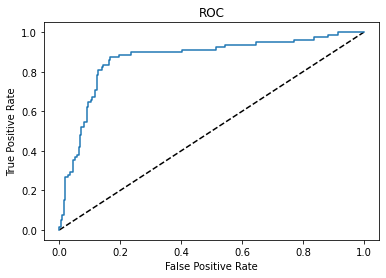

In [866]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

# Saving the model using joblib

In [867]:
import joblib

In [868]:
joblib.dump(gd_final,'insurance_fraud.obj')

['insurance_fraud.obj']

# Conclusion

We have successfully trained the model with 82% accuracy

In [869]:
model = joblib.load('insurance_fraud.obj')
result = model.predict(x_test)
accuracy_score(y_test,result)


0.8333333333333334

In [870]:
#Creating a dataframe with actual and predicted values

predicted_values = pd.DataFrame({'Actual':y_test,'Predicted':result})

In [871]:
#Printing the final result

predicted_values

,Actual,Predicted
202,0,0
337,0,0
822,0,0
599,0,1
987,1,1
...,...,...
497,0,0
686,0,0
188,1,1
516,0,0
